In [370]:
import pandas as pd
dataset = pd.read_csv('C:\\Users\\yashw\\OneDrive\\Desktop\\Project documents\\DOHMH_New_York_City_Restaurant_Inspection_Results.csv')


In [371]:
zip_data = pd.read_excel('C:\\Users\\yashw\\OneDrive\\Desktop\\Project documents\\ZIP_TRACT_032021.xlsx')
zip_data = zip_data[['ZIP','TRACT']]
census_tracts = pd.read_csv('C:\\Users\\yashw\\OneDrive\\Desktop\\Project documents\\nyc_census_tracts.csv')

In [372]:
census_tracts = pd.read_csv('C:\\Users\\yashw\\OneDrive\\Desktop\\Project documents\\nyc_census_tracts.csv')

In [373]:
census_zip = pd.merge(census_tracts, zip_data, left_on = 'CensusTract', right_on = 'TRACT', how = 'inner')

In [374]:
census_zip.drop(['CensusTract', 'TRACT'],axis=1,inplace=True)
# census_zip.drop_duplicates()
census_zip

,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,ZIP
0,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,4.2,...,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7,10473
1,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,...,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5,10462
2,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,...,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5,10473
3,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,0.0,...,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7,10473
4,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,2.1,...,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2,10454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,Richmond,Staten Island,6279,3093,3186,35.8,28.7,17.6,0.0,14.3,...,0.0,1.3,46.6,2668,74.4,22.5,3.2,0.0,6.2,10303
3197,Richmond,Staten Island,6279,3093,3186,35.8,28.7,17.6,0.0,14.3,...,0.0,1.3,46.6,2668,74.4,22.5,3.2,0.0,6.2,10314
3198,Richmond,Staten Island,2550,953,1597,27.1,6.2,60.4,0.0,6.3,...,0.0,0.0,38.2,710,73.8,21.8,4.4,0.0,13.8,10303
3199,Richmond,Staten Island,4611,2043,2568,20.9,14.7,61.9,0.0,0.9,...,0.0,2.7,40.9,1308,84.7,12.6,2.7,0.0,9.4,10303


In [375]:
#dropping unwanted columns so that multiple records can be summed based on repeated zip code
dropped_census_data = census_zip.drop(['County','Borough'], axis=1)
#As one zipcode has multiple records we are just summing the columns of repeated zip code
dropped_census_data = dropped_census_data.groupby('ZIP').sum()
#Drop Duplicates from the census data to avoid create more records
census_zip_unique = census_zip[['County','Borough', 'ZIP']].drop_duplicates()
#Merging census df with zipcode into our main zip data as we removed earlier for numeric summing of same zipcode entries
final_census_data = pd.merge(dropped_census_data, census_zip_unique, left_on = 'ZIP', right_on = 'ZIP', how='inner')
final_census_data

,ZIP,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,County,Borough
0,10001,54931,27337,27594,118.3,827.8,79.5,3.9,331.3,41352,...,97.4,353.7,35265,1216.2,66.1,116.3,1.3,90.6,New York,Manhattan
1,10002,89904,42706,47198,476.1,489.9,122.0,2.4,560.4,63106,...,71.8,542.6,40454,1414.8,148.2,133.4,3.7,149.0,New York,Manhattan
2,10003,83254,39495,43759,104.5,1089.0,56.3,4.3,192.5,67202,...,113.2,371.2,50864,1277.4,84.5,135.6,2.5,86.2,New York,Manhattan
3,10004,21681,10435,11246,38.7,268.3,7.4,0.0,75.4,14888,...,29.2,107.3,15591,356.8,24.1,19.0,0.0,14.4,New York,Manhattan
4,10005,17798,8824,8974,20.6,209.6,8.1,0.5,55.0,12772,...,23.1,74.7,12814,271.9,15.7,12.4,0.0,10.7,New York,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,11691,68747,31583,37164,292.6,257.4,495.1,1.5,28.8,38981,...,32.8,523.1,26157,861.4,180.6,55.4,3.0,125.0,Queens,Queens
283,11692,32889,15307,17582,184.4,116.4,344.0,0.0,33.6,20564,...,14.8,390.5,12408,551.6,118.6,29.5,0.3,92.4,Queens,Queens
284,11693,15731,7618,8113,86.4,198.0,87.8,0.0,21.4,11059,...,8.7,207.1,6964,292.4,98.4,8.9,0.3,40.0,Queens,Queens
285,11694,21772,11044,10728,78.4,545.8,50.7,0.7,19.5,16042,...,17.4,286.7,9153,464.2,199.0,36.1,0.6,48.9,Queens,Queens


In [376]:
final_census_data = final_census_data[final_census_data['Asian']!=0.0]
final_census_data

,ZIP,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,County,Borough
0,10001,54931,27337,27594,118.3,827.8,79.5,3.9,331.3,41352,...,97.4,353.7,35265,1216.2,66.1,116.3,1.3,90.6,New York,Manhattan
1,10002,89904,42706,47198,476.1,489.9,122.0,2.4,560.4,63106,...,71.8,542.6,40454,1414.8,148.2,133.4,3.7,149.0,New York,Manhattan
2,10003,83254,39495,43759,104.5,1089.0,56.3,4.3,192.5,67202,...,113.2,371.2,50864,1277.4,84.5,135.6,2.5,86.2,New York,Manhattan
3,10004,21681,10435,11246,38.7,268.3,7.4,0.0,75.4,14888,...,29.2,107.3,15591,356.8,24.1,19.0,0.0,14.4,New York,Manhattan
4,10005,17798,8824,8974,20.6,209.6,8.1,0.5,55.0,12772,...,23.1,74.7,12814,271.9,15.7,12.4,0.0,10.7,New York,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,11580,4113,2012,2101,8.2,4.9,80.9,0.3,4.8,2682,...,6.2,47.1,2249,74.5,19.7,5.7,0.0,3.9,Queens,Queens
282,11691,68747,31583,37164,292.6,257.4,495.1,1.5,28.8,38981,...,32.8,523.1,26157,861.4,180.6,55.4,3.0,125.0,Queens,Queens
283,11692,32889,15307,17582,184.4,116.4,344.0,0.0,33.6,20564,...,14.8,390.5,12408,551.6,118.6,29.5,0.3,92.4,Queens,Queens
284,11693,15731,7618,8113,86.4,198.0,87.8,0.0,21.4,11059,...,8.7,207.1,6964,292.4,98.4,8.9,0.3,40.0,Queens,Queens


In [377]:
import pandas as pd
dataset = pd.read_csv('C:\\Users\\yashw\\OneDrive\\Desktop\\Project documents\\DOHMH_New_York_City_Restaurant_Inspection_Results.csv')
# Extracting Zipcode for clustering and Cuisine data as OneHot encoded for K-Means processing 
working_dataset = dataset[['ZIPCODE', 'CUISINE DESCRIPTION']]
cuisine_onehot = pd.get_dummies(working_dataset['CUISINE DESCRIPTION'], prefix='', prefix_sep='')

#Attaching Zipcode from working dataset to onehot encoded dataset
cuisine_onehot['ZIPCODE'] = working_dataset['ZIPCODE']

# move ZIPCODE column to the first column
cols = list(cuisine_onehot)
cols.insert(0, cols.pop(cols.index('ZIPCODE')))
cuisine_onehot = cuisine_onehot.loc[:,cols]

#Combining mulitple records of same zipcode to single row
cuisine_onehot = cuisine_onehot.groupby('ZIPCODE').mean().reset_index()
cuisine_onehot = cuisine_onehot[['ZIPCODE','Asian','Japanese','Chinese','Korean','Chinese/Japanese','Chinese/Cuban','Thai','Vietnamese/Cambodian/Malaysia','Filipino','Indonesian','Pakistani','Indian','Russian','Middle Eastern','Bangladeshi']]
cuisine_onehot

,ZIPCODE,Asian,Japanese,Chinese,Korean,Chinese/Japanese,Chinese/Cuban,Thai,Vietnamese/Cambodian/Malaysia,Filipino,Indonesian,Pakistani,Indian,Russian,Middle Eastern,Bangladeshi
0,10001.0,0.033128,0.034526,0.030612,0.134890,0.000000,0.000000,0.004613,0.000000,0.000000,0.00000,0.002796,0.004892,0.000419,0.004193,0.000000
1,10002.0,0.022237,0.028479,0.275813,0.000910,0.000000,0.000000,0.014304,0.005982,0.000910,0.00000,0.000000,0.005072,0.000000,0.007022,0.000000
2,10003.0,0.036830,0.116974,0.039352,0.011346,0.000450,0.001891,0.031968,0.006664,0.003602,0.00027,0.000000,0.019181,0.003602,0.008375,0.005763
3,10004.0,0.021815,0.029747,0.012395,0.000000,0.000000,0.000000,0.010907,0.000000,0.000000,0.00000,0.000000,0.015865,0.000000,0.000000,0.000000
4,10005.0,0.000000,0.016588,0.008294,0.000000,0.053318,0.000000,0.000000,0.048578,0.000000,0.00000,0.000000,0.003555,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,11691.0,0.000000,0.000000,0.210892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
229,11692.0,0.000000,0.000000,0.072581,0.000000,0.000000,0.000000,0.153226,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
230,11693.0,0.031915,0.000000,0.097872,0.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.00000,0.000000,0.000000,0.068085,0.000000,0.000000
231,11694.0,0.000000,0.046176,0.163059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [378]:
cuisine_onehot['No of asian restaurants'] = cuisine_onehot['Asian']+cuisine_onehot['Japanese']+cuisine_onehot['Chinese']+cuisine_onehot['Korean']+cuisine_onehot['Chinese/Japanese']+cuisine_onehot['Chinese/Cuban']+cuisine_onehot['Thai']+cuisine_onehot['Vietnamese/Cambodian/Malaysia']+cuisine_onehot['Filipino']+cuisine_onehot['Indonesian']+cuisine_onehot['Pakistani']+cuisine_onehot['Indian']+cuisine_onehot['Russian']+cuisine_onehot['Middle Eastern']+cuisine_onehot['Bangladeshi']
cuisine_onehot = cuisine_onehot[['ZIPCODE','No of asian restaurants']]
cuisine_onehot

,ZIPCODE,No of asian restaurants
0,10001.0,0.250070
1,10002.0,0.360728
2,10003.0,0.286267
3,10004.0,0.090729
4,10005.0,0.130332
...,...,...
228,11691.0,0.210892
229,11692.0,0.225806
230,11693.0,0.251064
231,11694.0,0.209235


In [379]:
final_census_data

,ZIP,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,County,Borough
0,10001,54931,27337,27594,118.3,827.8,79.5,3.9,331.3,41352,...,97.4,353.7,35265,1216.2,66.1,116.3,1.3,90.6,New York,Manhattan
1,10002,89904,42706,47198,476.1,489.9,122.0,2.4,560.4,63106,...,71.8,542.6,40454,1414.8,148.2,133.4,3.7,149.0,New York,Manhattan
2,10003,83254,39495,43759,104.5,1089.0,56.3,4.3,192.5,67202,...,113.2,371.2,50864,1277.4,84.5,135.6,2.5,86.2,New York,Manhattan
3,10004,21681,10435,11246,38.7,268.3,7.4,0.0,75.4,14888,...,29.2,107.3,15591,356.8,24.1,19.0,0.0,14.4,New York,Manhattan
4,10005,17798,8824,8974,20.6,209.6,8.1,0.5,55.0,12772,...,23.1,74.7,12814,271.9,15.7,12.4,0.0,10.7,New York,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,11580,4113,2012,2101,8.2,4.9,80.9,0.3,4.8,2682,...,6.2,47.1,2249,74.5,19.7,5.7,0.0,3.9,Queens,Queens
282,11691,68747,31583,37164,292.6,257.4,495.1,1.5,28.8,38981,...,32.8,523.1,26157,861.4,180.6,55.4,3.0,125.0,Queens,Queens
283,11692,32889,15307,17582,184.4,116.4,344.0,0.0,33.6,20564,...,14.8,390.5,12408,551.6,118.6,29.5,0.3,92.4,Queens,Queens
284,11693,15731,7618,8113,86.4,198.0,87.8,0.0,21.4,11059,...,8.7,207.1,6964,292.4,98.4,8.9,0.3,40.0,Queens,Queens


In [380]:
final_main_data = pd.merge(final_census_data, cuisine_onehot, left_on = 'ZIP', right_on = 'ZIPCODE', how='inner')

final_main_data

,ZIP,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,...,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,County,Borough,ZIPCODE,No of asian restaurants
0,10001,54931,27337,27594,118.3,827.8,79.5,3.9,331.3,41352,...,35265,1216.2,66.1,116.3,1.3,90.6,New York,Manhattan,10001.0,0.250070
1,10002,89904,42706,47198,476.1,489.9,122.0,2.4,560.4,63106,...,40454,1414.8,148.2,133.4,3.7,149.0,New York,Manhattan,10002.0,0.360728
2,10003,83254,39495,43759,104.5,1089.0,56.3,4.3,192.5,67202,...,50864,1277.4,84.5,135.6,2.5,86.2,New York,Manhattan,10003.0,0.286267
3,10004,21681,10435,11246,38.7,268.3,7.4,0.0,75.4,14888,...,15591,356.8,24.1,19.0,0.0,14.4,New York,Manhattan,10004.0,0.090729
4,10005,17798,8824,8974,20.6,209.6,8.1,0.5,55.0,12772,...,12814,271.9,15.7,12.4,0.0,10.7,New York,Manhattan,10005.0,0.130332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,11436,23904,11658,12246,154.7,11.9,729.4,5.8,74.9,14951,...,11029,839.7,191.0,68.1,1.2,135.2,Queens,Queens,11436.0,0.198630
224,11691,68747,31583,37164,292.6,257.4,495.1,1.5,28.8,38981,...,26157,861.4,180.6,55.4,3.0,125.0,Queens,Queens,11691.0,0.210892
225,11692,32889,15307,17582,184.4,116.4,344.0,0.0,33.6,20564,...,12408,551.6,118.6,29.5,0.3,92.4,Queens,Queens,11692.0,0.225806
226,11693,15731,7618,8113,86.4,198.0,87.8,0.0,21.4,11059,...,6964,292.4,98.4,8.9,0.3,40.0,Queens,Queens,11693.0,0.251064


In [381]:
final_working_data = final_main_data[['ZIP','TotalPop','Asian','IncomePerCap','No of asian restaurants']]
final_working_data




,ZIP,TotalPop,Asian,IncomePerCap,No of asian restaurants
0,10001,54931,331.3,1395408.0,0.250070
1,10002,89904,560.4,576304.0,0.360728
2,10003,83254,192.5,1303501.0,0.286267
3,10004,21681,75.4,400647.0,0.090729
4,10005,17798,55.0,278358.0,0.130332
...,...,...,...,...,...
223,11436,23904,74.9,263156.0,0.198630
224,11691,68747,28.8,206725.0,0.210892
225,11692,32889,33.6,142129.0,0.225806
226,11693,15731,21.4,112091.0,0.251064


In [382]:
# determining the name of the file
file_name = 'thesuperdata.xlsx'
  
# saving the excel
final_working_data.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [383]:
final_working_data.loc[:,"Percentage of Asian Population"] = final_working_data["Asian"] / final_working_data["TotalPop"] * 100
final_working_data=final_working_data.set_index('ZIP')
final_working_data.drop(['Asian'], axis=1, inplace=True)
final_working_data

C:\Users\yashw\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\yashw\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,TotalPop,IncomePerCap,No of asian restaurants,Percentage of Asian Population
ZIP,,,,
10001,54931,1395408.0,0.250070,0.603120
10002,89904,576304.0,0.360728,0.623332
10003,83254,1303501.0,0.286267,0.231220
10004,21681,400647.0,0.090729,0.347770
10005,17798,278358.0,0.130332,0.309023
...,...,...,...,...
11436,23904,263156.0,0.198630,0.313337
11691,68747,206725.0,0.210892,0.041893
11692,32889,142129.0,0.225806,0.102162


C:\Users\yashw\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


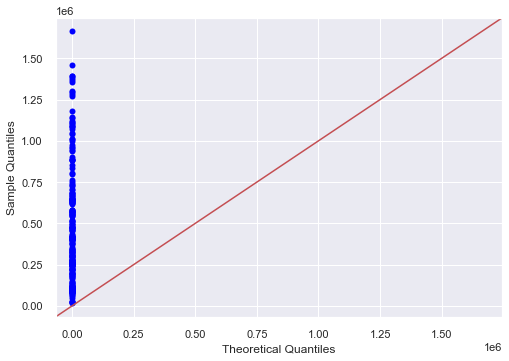

In [384]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

sm.qqplot(final_working_data['IncomePerCap'], line='45')
pylab.show()



C:\Users\yashw\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


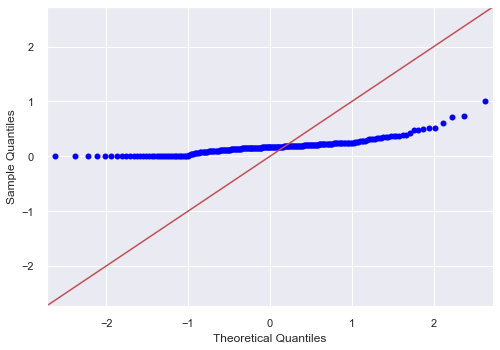

In [385]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

sm.qqplot(final_working_data['No of asian restaurants'], line='45')
pylab.show()

C:\Users\yashw\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


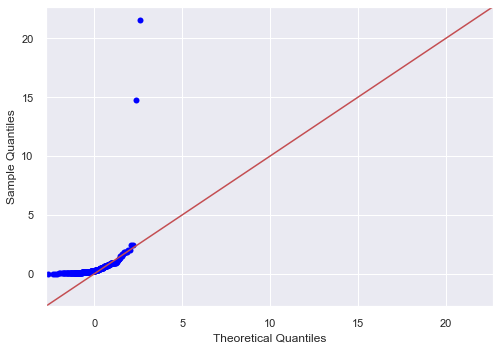

In [386]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

sm.qqplot(final_working_data['Percentage of Asian Population'], line='45')
pylab.show()

In [387]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
final_working_data_standardzied = final_working_data


features = ['TotalPop',	'IncomePerCap'	,'No of asian restaurants'	,'Percentage of Asian Population']

ct = ColumnTransformer([
        ('somename', StandardScaler(), features)
    ], remainder='passthrough')

final_working_data_standardzied[features] = ct.fit_transform(final_working_data[features])
final_working_data_standardzied

,TotalPop,IncomePerCap,No of asian restaurants,Percentage of Asian Population
ZIP,,,,
10001,-0.024692,2.588867,0.563117,-0.001358
10002,0.868963,0.281117,1.380885,0.010195
10003,0.699038,2.329928,0.830618,-0.213933
10004,-0.874319,-0.213780,-0.614419,-0.147314
10005,-0.973540,-0.558318,-0.321752,-0.169461
...,...,...,...,...
11436,-0.817515,-0.601148,0.182975,-0.166996
11691,0.328345,-0.760138,0.273592,-0.322151
11692,-0.587924,-0.942131,0.383809,-0.287702


In [388]:
final_working_data_standardzied.describe()

,TotalPop,IncomePerCap,No of asian restaurants,Percentage of Asian Population
count,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02
mean,4.674623e-17,5.453727e-17,-3.116416e-17,4.285071e-17
std,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00
min,-1.424520e+00,-1.295296e+00,-1.284908e+00,-3.426591e-01
25%,-8.725750e-01,-7.767130e-01,-5.260358e-01,-2.812827e-01
50%,-5.936666e-02,-2.073326e-01,-3.426082e-02,-2.027294e-01
75%,7.039628e-01,4.891517e-01,3.813868e-01,4.000801e-02
max,2.356463e+00,3.343298e+00,6.105125e+00,1.200645e+01


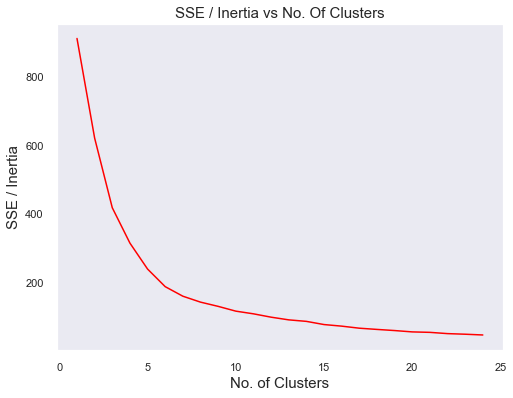

In [389]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt



inertia_values = []
for k in range(1,25):
    #run k-Means
    kmeans = KMeans(n_clusters=k, random_state=5).fit(final_working_data_standardzied)
    inertia_values.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1, k+1), inertia_values, color='red')
plt.xlabel('No. of Clusters', fontsize=15)
plt.ylabel('SSE / Inertia', fontsize=15)
plt.title('SSE / Inertia vs No. Of Clusters', fontsize=15)
plt.grid()
plt.show()

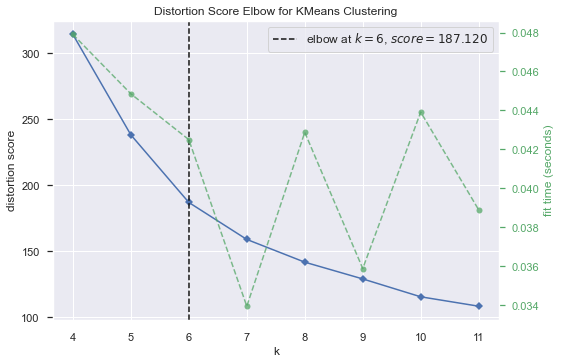

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [390]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(final_working_data_standardzied)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

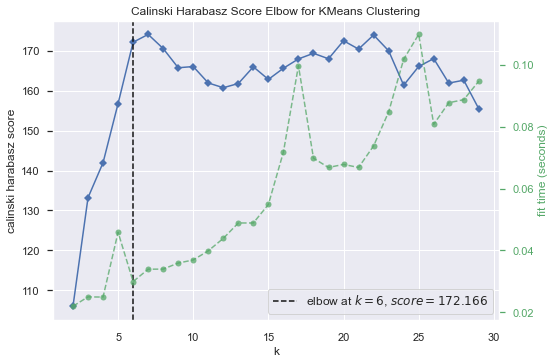

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [391]:
# Calinski Harabasz Score for K means# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(final_working_data_standardzied)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [392]:
no_clusters = 6
kmeans = KMeans(no_clusters, random_state = 42)
kmeans.fit(final_working_data_standardzied)
# Get the cluster label for each neighborhood in Vancouver CSD.
cluster = kmeans.fit_predict(final_working_data_standardzied)
final_working_data.loc[:,'Cluster'] = cluster
final_working_data



,TotalPop,IncomePerCap,No of asian restaurants,Percentage of Asian Population,Cluster
ZIP,,,,,
10001,-0.024692,2.588867,0.563117,-0.001358,5
10002,0.868963,0.281117,1.380885,0.010195,0
10003,0.699038,2.329928,0.830618,-0.213933,5
10004,-0.874319,-0.213780,-0.614419,-0.147314,1
10005,-0.973540,-0.558318,-0.321752,-0.169461,1
...,...,...,...,...,...
11436,-0.817515,-0.601148,0.182975,-0.166996,3
11691,0.328345,-0.760138,0.273592,-0.322151,3
11692,-0.587924,-0.942131,0.383809,-0.287702,3


In [393]:
df1 = pd.read_csv('C:\\Users\\yashw\\OneDrive\\Desktop\\Project documents\\usZip_latlon.csv')


final_working_data = pd.merge(final_working_data, df1, left_on = 'ZIP', right_on = 'ZIP', how='inner')

final_working_data

,ZIP,TotalPop,IncomePerCap,No of asian restaurants,Percentage of Asian Population,Cluster,LAT,LNG
0,10001,-0.024692,2.588867,0.563117,-0.001358,5,40.750633,-73.997177
1,10002,0.868963,0.281117,1.380885,0.010195,0,40.715775,-73.986212
2,10003,0.699038,2.329928,0.830618,-0.213933,5,40.731829,-73.989181
3,10004,-0.874319,-0.213780,-0.614419,-0.147314,1,40.688630,-74.018244
4,10005,-0.973540,-0.558318,-0.321752,-0.169461,1,40.706027,-74.008835
...,...,...,...,...,...,...,...,...
203,11436,-0.817515,-0.601148,0.182975,-0.166996,3,40.675807,-73.796622
204,11691,0.328345,-0.760138,0.273592,-0.322151,3,40.601278,-73.761651
205,11692,-0.587924,-0.942131,0.383809,-0.287702,3,40.594095,-73.792896
206,11693,-1.026358,-1.026760,0.570462,-0.268339,3,40.590692,-73.809749


In [394]:
cluster_labels, spending_powers, target_customers, competitors = [], [], [], []
for label in range(no_clusters):
    cluster_labels.append(label)
    spending_powers.append(final_working_data[final_working_data['Cluster'] == label]['IncomePerCap'].mean())
    target_customers.append(final_working_data[final_working_data['Cluster'] == label]['Percentage of Asian Population'].mean())
    competitors.append(final_working_data[final_working_data['Cluster'] == label]['No of asian restaurants'].mean())
    

df = pd.DataFrame(list(zip(cluster_labels, spending_powers, target_customers, competitors)),
               columns =['cluster_labels', 'spending_powers','target_customers', 'competitors'])

df

,cluster_labels,spending_powers,target_customers,competitors
0,0,0.681004,-0.157440,0.500557
1,1,-0.909034,0.042493,-0.978002
2,2,-0.959179,12.006451,-1.284908
3,3,-0.261562,-0.143456,0.085610
4,4,-0.088573,0.385160,3.108186
5,5,2.032735,-0.188527,0.197351


In [395]:
final_working_data[final_working_data['Cluster'] == 5]

,ZIP,TotalPop,IncomePerCap,No of asian restaurants,Percentage of Asian Population,Cluster,LAT,LNG
0,10001,-0.024692,2.588867,0.563117,-0.001358,5,40.750633,-73.997177
2,10003,0.699038,2.329928,0.830618,-0.213933,5,40.731829,-73.989181
6,10007,-0.433612,1.066007,-0.266282,-0.114541,5,40.713848,-74.007755
8,10010,0.349477,1.989235,-0.226218,-0.190740,5,40.739065,-73.982255
9,10011,0.675222,2.578629,0.036209,-0.242016,5,40.742039,-74.000620
10,10012,-0.166535,2.274991,-0.173187,-0.122460,5,40.725581,-73.998078
11,10013,-0.304673,1.888465,1.473961,-0.052332,5,40.720103,-74.004903
12,10014,-0.244624,1.672716,-0.451472,-0.249976,5,40.734012,-74.006746
13,10016,0.396442,1.732276,0.755841,-0.178650,5,40.745224,-73.978297
14,10017,-0.390939,1.820360,0.308522,-0.141947,5,40.752360,-73.972493


In [396]:
final_working_data.describe(percentiles=[.33,.66,.99])

,ZIP,TotalPop,IncomePerCap,No of asian restaurants,Percentage of Asian Population,Cluster,LAT,LNG
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,10762.538462,0.120090,0.094643,0.079008,-0.046761,2.375000,40.727561,-73.921415
std,577.940712,0.964613,0.994801,0.883286,0.875182,1.586096,0.078526,0.099310
min,10001.000000,-1.424520,-1.295296,-1.284908,-0.342659,0.000000,40.509183,-74.237785
33%,10305.310000,-0.297409,-0.545307,-0.211991,-0.257643,1.000000,40.698116,-73.972472
50%,11002.500000,0.019157,-0.158607,0.012431,-0.206099,3.000000,40.732920,-73.932755
66%,11224.620000,0.498658,0.292045,0.215236,-0.086173,3.000000,40.758062,-73.885802
99%,11691.930000,2.227220,2.588150,3.152478,0.819227,5.000000,40.888910,-73.712241
max,11694.000000,2.356463,3.343298,4.095193,12.006451,5.000000,40.898868,-73.680292


C:\Users\yashw\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


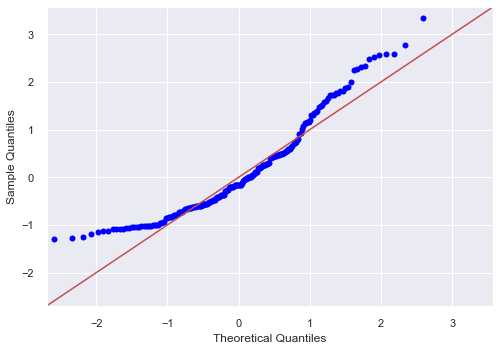

In [397]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

sm.qqplot(final_working_data['IncomePerCap'], line='45')
pylab.show()

In [398]:
import geocoder

# Import geopy.geocoders.Nominatim in order to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

address = 'New York, United States'

# We are using Arcgis API to request latitude and longitude information for NYC City.
g = geocoder.arcgis(address) 
lat_lng_coords = g.latlng
vcv_latitude = lat_lng_coords[0]
vcv_longitude = lat_lng_coords[1]
print('The geograpical coordinate of NYC City are {}, {}.'.format(vcv_latitude, vcv_longitude))

The geograpical coordinate of nyc City are 40.71455000000003, -74.00713999999994.


In [399]:
# create map of NYC using latitude and longitude values
import folium # map rendering library
map_NYC = folium.Map(location=[vcv_latitude, vcv_longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhoods in zip(final_working_data['LAT'], final_working_data['LNG'], final_working_data['ZIP']):
    label = '{}'.format(neighborhoods)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NYC)  
    
map_NYC

In [400]:
# create map
import numpy as np # library to handle data in a vectorized manner
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
map_NYC_cluster = folium.Map(location=[vcv_latitude, vcv_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(no_clusters)
ys = [i + x + (i*x)**2 for i in range(no_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(final_working_data['LAT'], final_working_data['LNG'], final_working_data['ZIP'], final_working_data['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_NYC_cluster)
       
map_NYC_cluster

In [401]:
# create map of NYC using latitude and longitude values
import folium # map rendering library
map_NYC = folium.Map(location=[vcv_latitude, vcv_longitude], zoom_start=11)
fnld = final_working_data[final_working_data['Cluster'].isin([5]) ]
fnld
# add markers to map
for lat, lng, neighborhoods in zip(fnld['LAT'], fnld['LNG'], fnld['ZIP']):
    label = '{}'.format(neighborhoods)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NYC)  
    
map_NYC